# Aula Short-Time Fourier Transform (STFT)
### Análise e processamento de sinais de áudio
### 09/07/2024
### **Mestranda: Dieine Bernieri Schiavon (PPG TIG Saúde)**

# Gerar espectrograma com a biblioteca Librosa


* https://librosa.org/doc/latest/index.html

* `Librosa` é uma biblioteca python para análise de música e áudio


![Librosa](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcScAFcestBvn70IBwmzk3QvAYopRB4PeYeObDGD7QaPQkcjnzoZRNNECesuow-X_zMAG-s&usqp=CAU)



* Sobre o conjunto de dados:

Banco de dados audiovisual Ryerson de fala emocional e música (RAVDESS)

* Arquivos somente de áudio de fala (16 bits, 48kHz .wav) do RAVDESS. Conjunto de dados completo de fala e música, áudio e vídeo (24,8 GB) disponível na Zenodo. A construção e validação perceptiva do RAVDESS são descritas em nosso artigo de acesso aberto no PLoS ONE.

* Arquivos:

 O RAVDESS contém 24 atores profissionais (12 mulheres, 12 homens), vocalizando duas declarações lexicalmente combinadas com um sotaque norte-americano neutro. As emoções da fala incluem expressões de calma, alegria, tristeza, raiva, medo, surpresa e nojo.

 emotions={
    '01':'neutral',

    '02':'calm',

    '03':'happy',

    '04':'sad',

    '05':'angry',

    '06':'fearful',

    '07':'disgust',

    '08':'surprised'
}


Referência dos sinais de áudio **RAVDESS**: https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio/data

## Sinal de fala  com a frase: **Kids are talking by the door**.

## Plotar espectrograma usando os parâmetros:

- Frame_size = window_size

- Hop_size


- Primeiro clicar no link para obter os áudios



In [ ]:
# Baixar pasta de arquivos compartilhadas

!gdown --folder https://www.google.com/url?q=https%3A%2F%2Fdrive.google.com%2Fdrive%2Ffolders%2F1Wrh258n7NQE_qCou3Ud-L3hIZRbGjE3j%3Fusp%3Ddrive_link


Retrieving folder contents
Processing file 1BhK4pGQsfv2Cz7DEKU9aWnPosqNziLQl 03-01-01-01-01-01-01.wav
Processing file 1n8lTXfc7ovI4_aWm2-D_RWVBB-70zVcy 03-01-01-01-01-01-02.wav
Processing file 1SGcYuTNi-rllQFbvUoXrXWhKPlLgtJtg 03-01-05-02-01-01-24.wav
Processing file 1NJIF8zFOO2gQrEqzzUugsvkWkeW-5ltn 03-01-08-02-01-01-24.wav
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1BhK4pGQsfv2Cz7DEKU9aWnPosqNziLQl
To: /content/audios/03-01-01-01-01-01-01.wav
100% 376k/376k [00:00<00:00, 71.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1n8lTXfc7ovI4_aWm2-D_RWVBB-70zVcy
To: /content/audios/03-01-01-01-01-01-02.wav
100% 410k/410k [00:00<00:00, 98.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1SGcYuTNi-rllQFbvUoXrXWhKPlLgtJtg
To: /content/audios/03-01-05-02-01-01-24.wav
100% 476k/476k [00:00<00:00, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=1NJIF8z

In [ ]:
import librosa
from IPython.display import Audio

# Carregar o sinal de fala de um arquivo WAV usando librosa
signal, fs = librosa.load('/content/audios/03-01-01-01-01-01-01.wav', sr=None) # sr=None para a frequência de amostragem original do áudio, senão assume o default da biblioteca 22050Hz

# Reproduzir o áudio
Audio(signal, rate=fs)

## Frequência de amostragem original do áudio

In [ ]:
fs

48000

In [ ]:
# # 48000Hz = 48000 ciclos p/seg

## Normalizando o audio

In [ ]:
import numpy as np

# Normalizar o sinal
signal = signal / np.max(np.abs(signal))

## Sinal normalizado no domínio do tempo

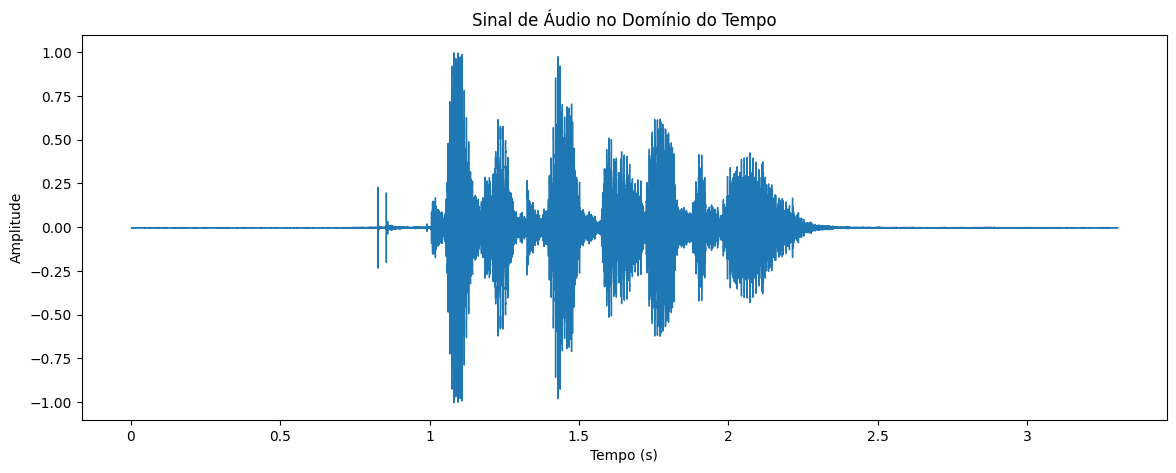

In [ ]:
import matplotlib.pyplot as plt

# Plotar o sinal no domínio do tempo
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=fs)
plt.title('Sinal de Áudio no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()


## Extraindo a STFT

In [ ]:
FRAME_SIZE = 2048  # Tamanho do quadro
HOP_SIZE = 512      # Tamanho do passo

signal = librosa.stft(signal, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)  # n_fft é o tamanho da janela de FFT que será aplicada em cada segmento do sinal.

signal.shape


(1025, 310)

In [ ]:
# Há `1025` pontos de frequência calculados após a STFT.
# Há `310` segmentos de tempo ao longo do sinal de áudio.

In [ ]:
type(signal[0][0])

numpy.complex64

## Calculando o espectrograma

In [ ]:
Y_signal = np.abs(signal) ** 2

type(Y_signal[0][0])

numpy.float32

## Visualizando o espectrograma

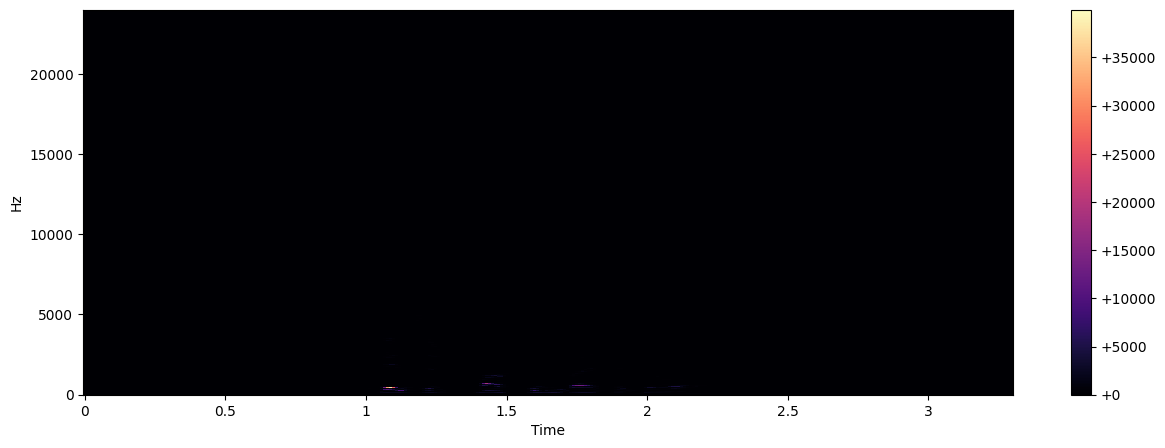

In [ ]:
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"): # Escala Linear
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(Y,
                             sr=fs,
                             hop_length=hop_length,
                             x_axis="time",
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

plot_spectrogram(Y_signal, fs, HOP_SIZE)

## Visualizando o espectrograma em escala logarítmica

Espectrograma Log-Amplitude

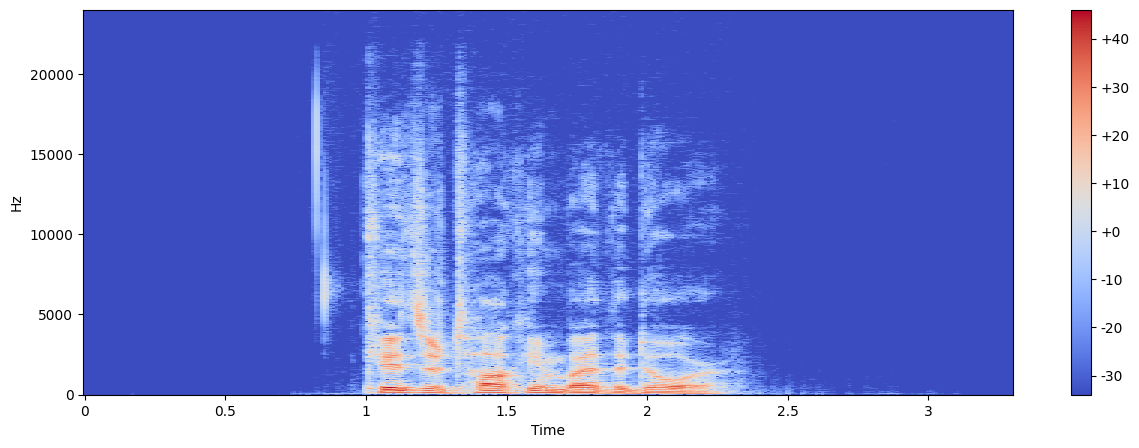

In [ ]:
Y_log_signal = librosa.power_to_db(Y_signal)

plot_spectrogram(Y_log_signal, fs, HOP_SIZE)

## Espectrograma Log-Frequência

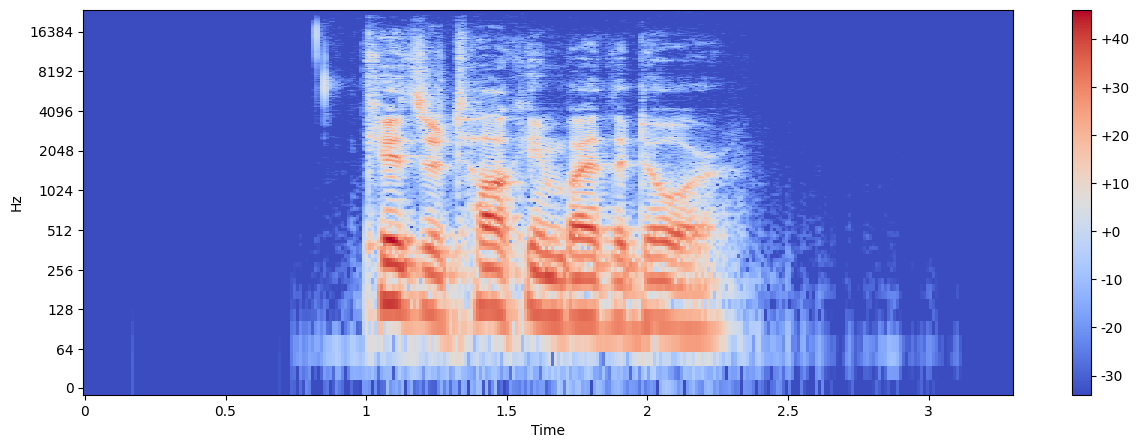

In [ ]:
plot_spectrogram(Y_log_signal, fs, HOP_SIZE, y_axis="log")

# Usando a biblioteca Pydub para cortar parte do sinal.

### Python: https://pypi.org/project/pydub/

### Github: https://github.com/jiaaro/pydub

 A biblioteca `pydub` é uma biblioteca para manipulação e processamento de áudio em Python. Ela oferece uma série de funcionalidades avançadas que facilitam tarefas como:

- Cortar trechos de áudio

- Juntar vários arquivos de áudio

- remover trechos silêncio

- Ajustar o volume

- Aplicar efeitos sonoros

- Conversão entre diferentes formatos de áudio

 `pydub` é útil para projetos que envolvem edição de áudio automatizada, processamento de sinais sonoros e preparação de dados para análise de áudio ou machine learning

In [ ]:
!pip install pydub -q

In [ ]:
from pydub import AudioSegment

#importing file from location by giving its path
sound = AudioSegment.from_wav("/content/audios/03-01-01-01-01-01-02.wav")

#Selecting Portion we want to cut
StrtMin = 0
StrtSec = 1
EndMin = 0
EndSec = 2.8
# Time to milliseconds conversion
StrtTime = StrtMin*60*1000+StrtSec*1000
EndTime = StrtMin*60*1000+EndSec*1000

# Opening file and extracting portion of it
extract = sound[StrtTime:EndTime]

# Saving file in required location
extract.export("/content/Cut-03-01-01-01-01-01-02.wav", format="wav")

#https://www.codespeedy.com/how-to-cut-a-particular-portion-of-an-mp3-file-in-python/

<_io.BufferedRandom name='/content/Cut-03-01-01-01-01-01-02.wav'>

In [ ]:
# Carregar o sinal cortado
signal, fs = librosa.load('/content/Cut-03-01-01-01-01-01-02.wav', sr=None)

# Reproduzir o áudio
Audio(signal, rate=fs)

# Frase: "kids are talking by the door"

In [ ]:
fs

48000

In [ ]:
# Normalizar o sinal

signal = signal / np.max(np.abs(signal))

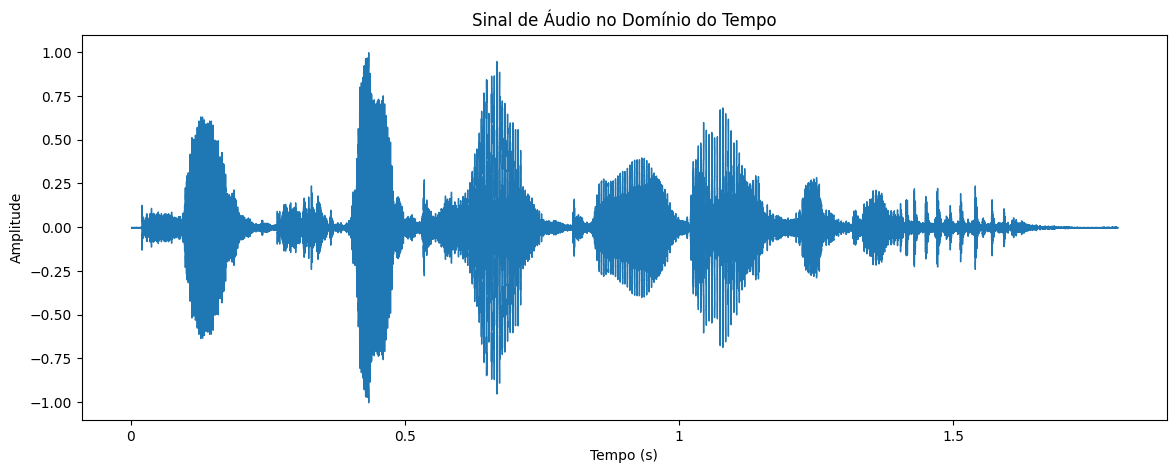

In [ ]:
# Plotar o sinal cortado no domínio do tempo

plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=fs)
plt.title('Sinal de Áudio no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()


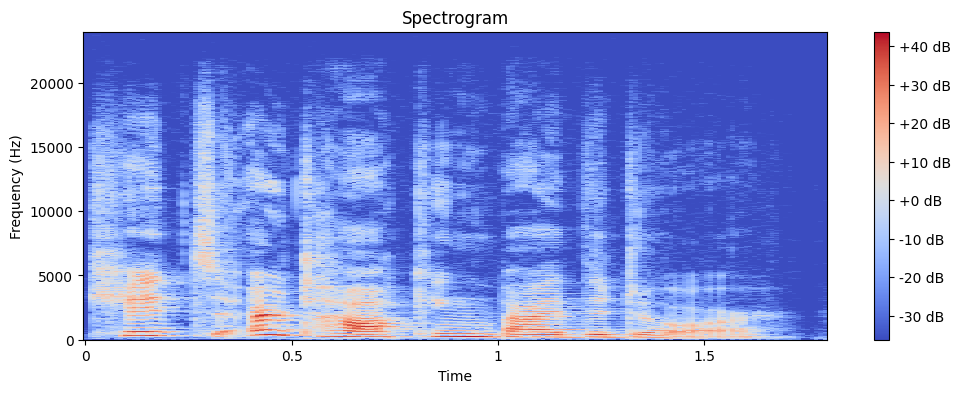

In [ ]:
# Plotar o espectrograma
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

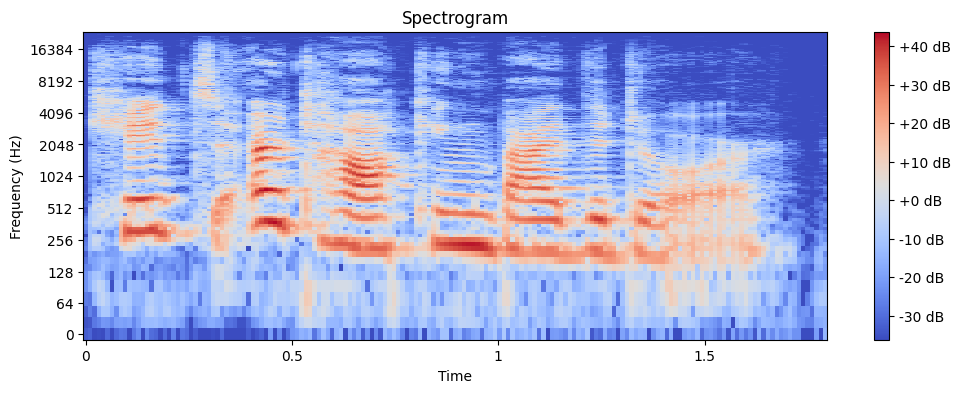

In [ ]:
# Calcular o STFT
X = librosa.stft(signal)

# Converter a potência do espectrograma para dB
Xdb = librosa.power_to_db(abs(X)**2)

# Plotar o espectrograma com escala logarítmica no eixo y
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

# Plotar só a imagem, sem axis e colorbar

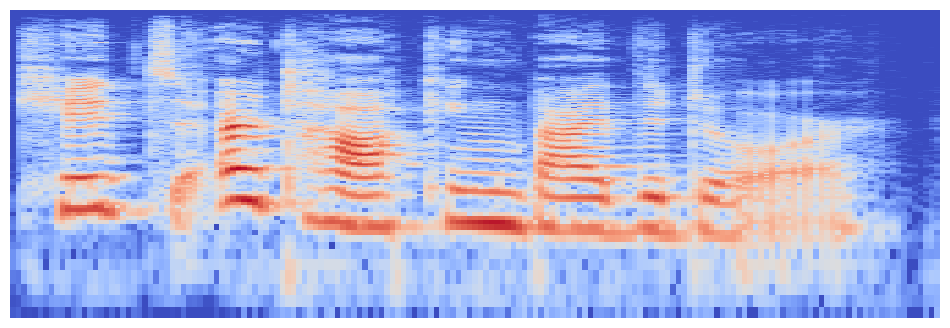

In [ ]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='log')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.axis('off')
plt.show()

# Exemplo Emoção 05-"Angry"

In [ ]:
# Carregar o sinal de fala de um arquivo WAV usando librosa
signal, fs = librosa.load('/content/audios/03-01-05-02-01-01-24.wav', sr=None)

# Reproduzir o áudio
Audio(signal, rate=fs)

#Frase: "kids are talking by the door"

In [ ]:
# Normalizar o sinal
signal = signal / np.max(np.abs(signal))

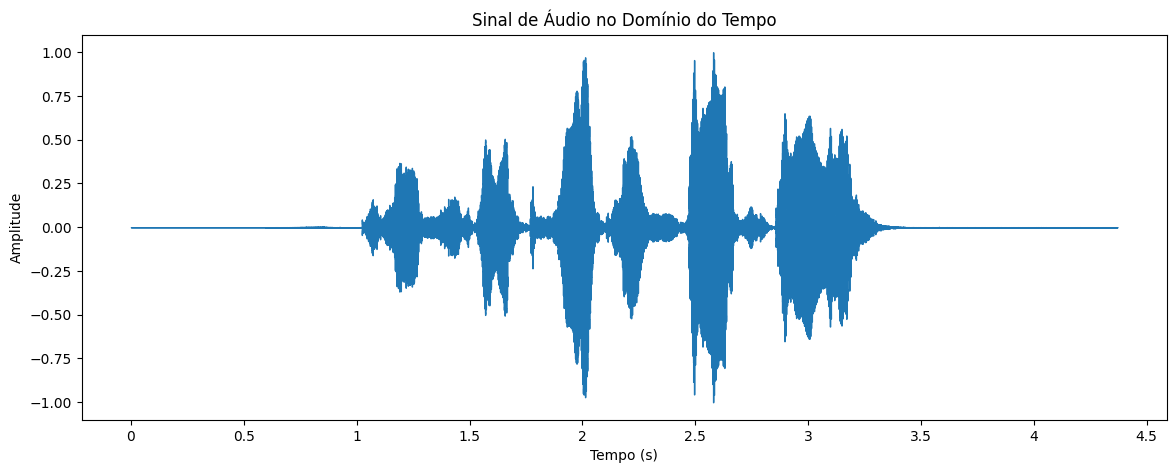

In [ ]:
# Plotar o sinal no domínio do tempo
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=fs)
plt.title('Sinal de Áudio no Domínio do Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.show()

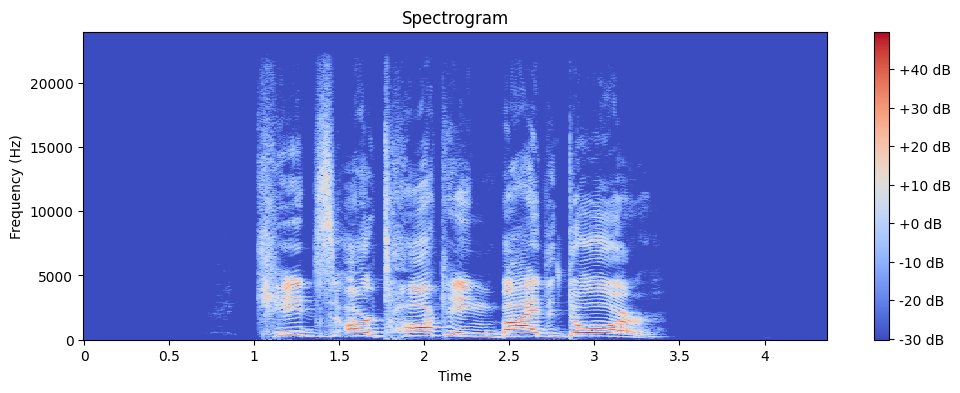

In [ ]:
import librosa.display

# Plot the spectrogram
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()

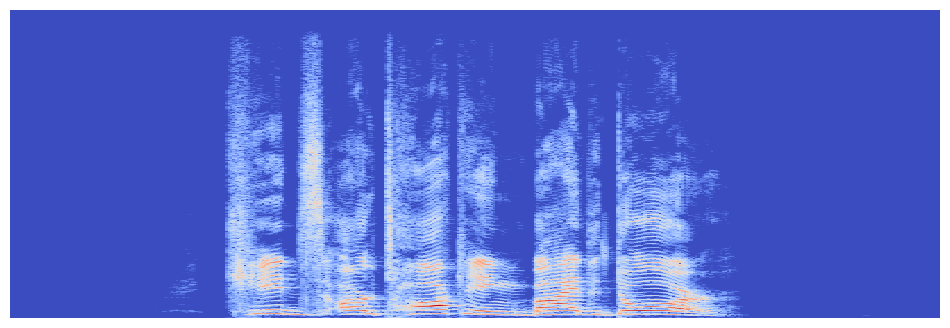

In [ ]:
# Plotar o espectrograma
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz')
#plt.colorbar(format='%+2.0f dB')
#plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.axis('off')
plt.show()

# Verificando as frequências do sinal aplicando a FFT

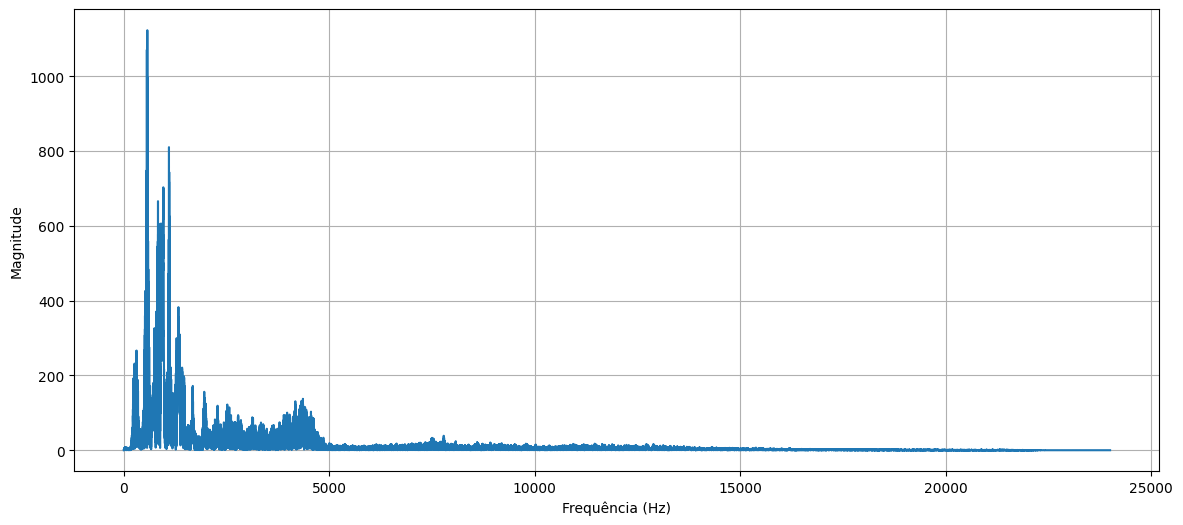

In [ ]:
# Calcular a FFT do sinal
fft_spectrum = np.fft.fft(signal)
frequencies = np.fft.fftfreq(len(signal), 1/fs)

# Calcular a magnitude da FFT
magnitude = np.abs(fft_spectrum)

# Filtrar apenas a metade positiva do espectro
half_range = len(frequencies) // 2
frequencies = frequencies[:half_range]
magnitude = magnitude[:half_range]

# Plotar o espectro de frequência
plt.figure(figsize=(14, 6))

plt.plot(frequencies, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)



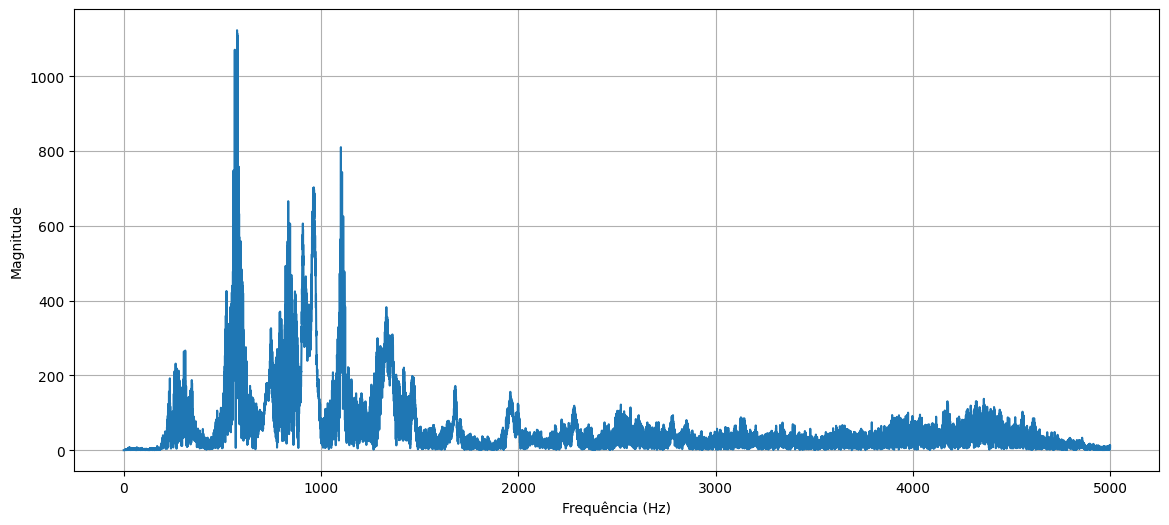

In [ ]:

# Filtrar apenas até 5000 Hz
max_freq = 5000
max_freq_index = np.argmax(frequencies > max_freq)  # Encontra o índice onde a frequência é maior que 5000 Hz
frequencies = frequencies[:max_freq_index]
magnitude = magnitude[:max_freq_index]

# Plotar o espectro
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()



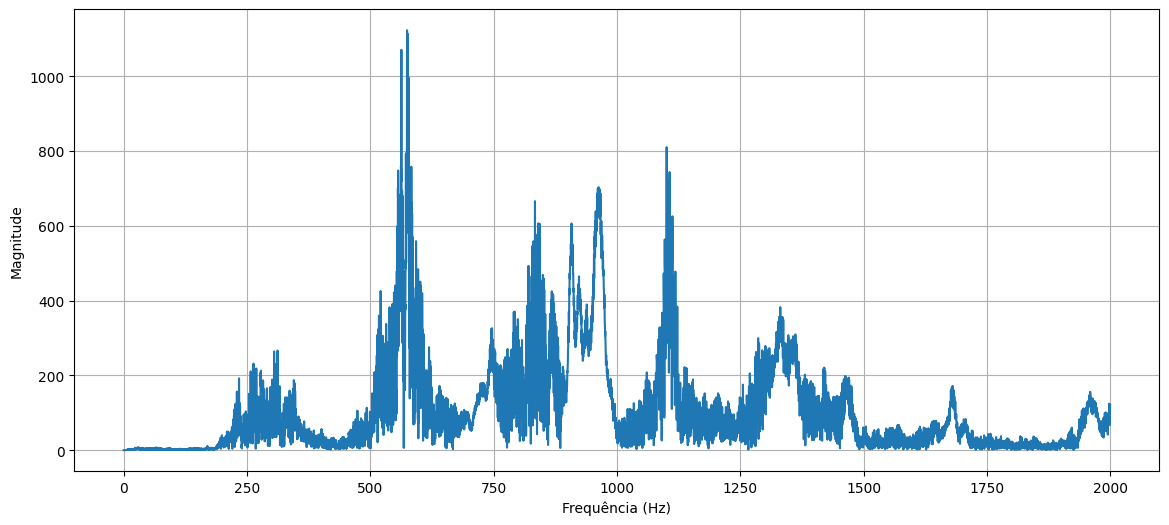

In [ ]:
# Filtrar apenas até 2000 Hz
max_freq = 2000
max_freq_index = np.argmax(frequencies > max_freq)
frequencies = frequencies[:max_freq_index]
magnitude = magnitude[:max_freq_index]

# Plotar o espectro
plt.figure(figsize=(14, 6))
plt.plot(frequencies, magnitude)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


# Mudando a cor do espectrograma - cmap='viridis'

* Verificar cores cmap:  https://matplotlib.org/stable/users/explain/colors/colormaps.html

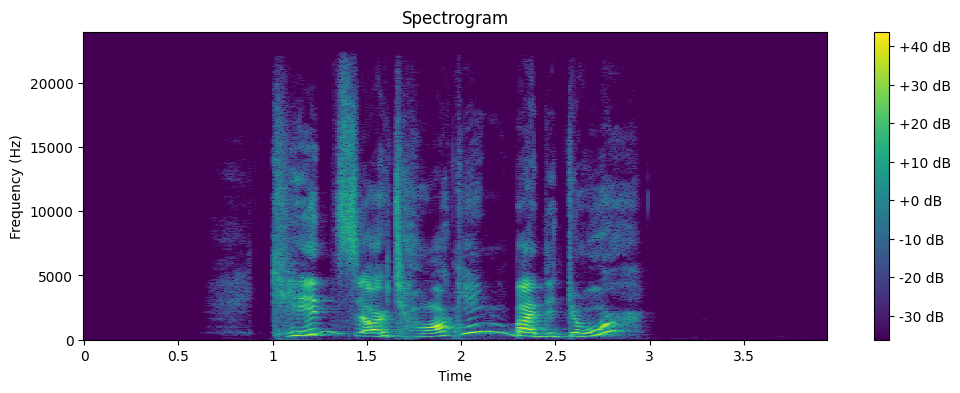

In [ ]:
# Carregar o sinal de áudio
signal, fs = librosa.load('/content/audios/03-01-08-02-01-01-24.wav', sr=None)

# Normalizar o áudio usando a biblioteca librosa
signal_normalized = librosa.util.normalize(signal)

# Calcular o espectrograma de potência em dB
X = librosa.stft(signal_normalized)
X_power = np.abs(X)**2
Xdb = librosa.power_to_db(X_power)

# Plotar o espectrograma
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz',cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.show()


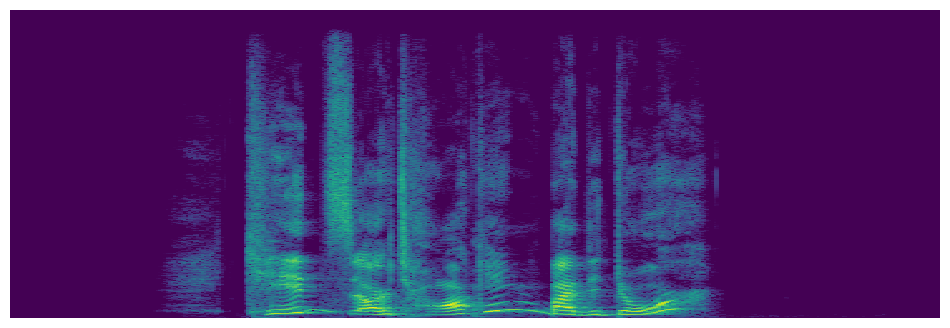

In [ ]:
# Plotar o espectrograma sem axis e sem colorbar
plt.figure(figsize=(12, 4))
librosa.display.specshow(Xdb, sr=fs, x_axis='time', y_axis='hz',cmap='viridis')
plt.xlabel('Time')
plt.ylabel('Frequency (Hz)')
plt.axis('off')
plt.show()

## Visualizando as funções de **Hann** e **Hamming**

- Referência do código adaptado:

Hann:  https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hann.html

Hamming: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.hamming.html

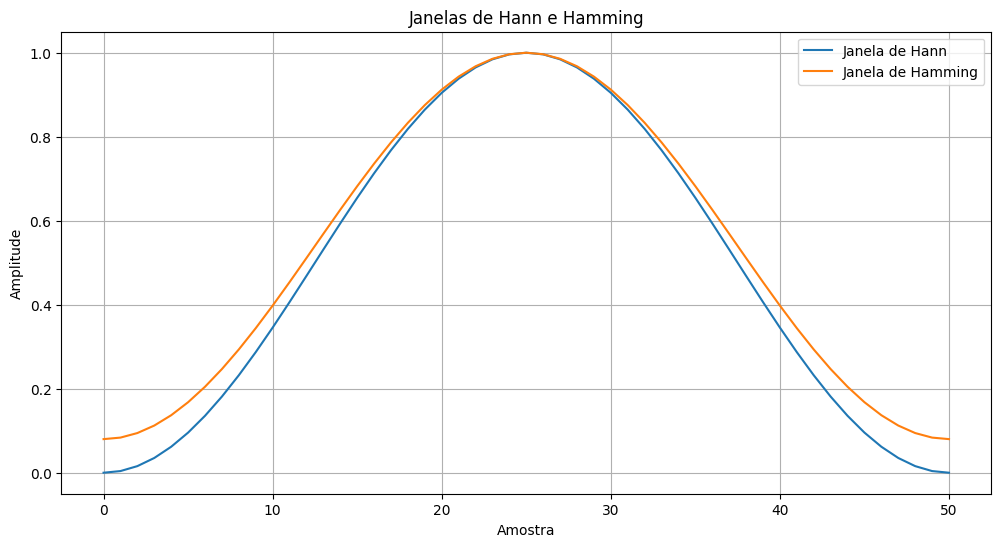

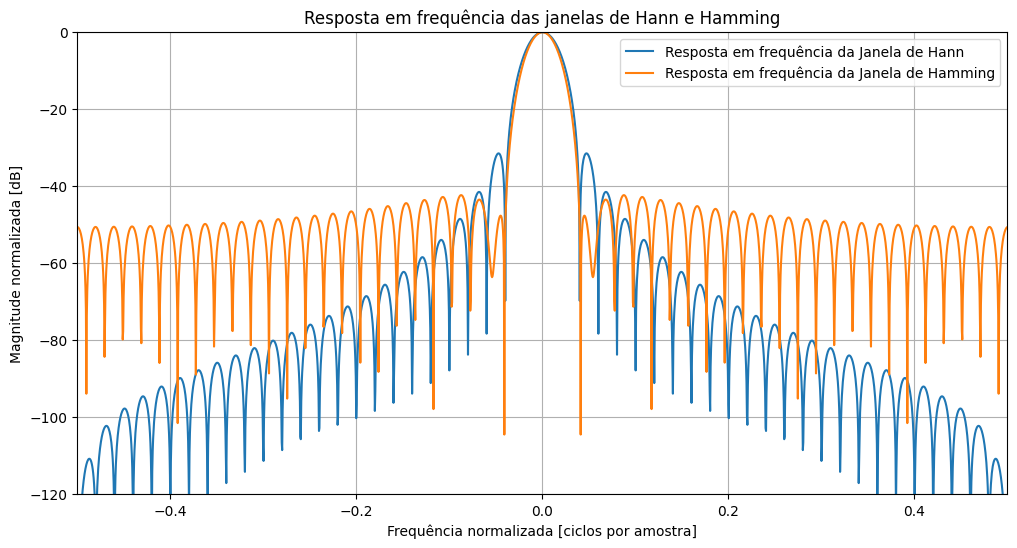

In [ ]:
import numpy as np
from scipy import signal
from scipy.fft import fft, fftshift
import matplotlib.pyplot as plt

# Parâmetros
window_length = 51
fft_length = 2048

# Gerar as janelas de Hann e Hamming
hann_window = signal.windows.hann(window_length)
hamming_window = signal.windows.hamming(window_length)

# Plotar as janelas de Hann e Hamming
plt.figure(figsize=(12, 6))
plt.plot(hann_window, label='Janela de Hann')
plt.plot(hamming_window, label='Janela de Hamming')
plt.title("Janelas de Hann e Hamming")
plt.ylabel("Amplitude")
plt.xlabel("Amostra")
plt.legend()
plt.grid()
plt.show()

# Função para plotar a resposta em frequência
def plot_frequency_response(window, window_name):
    A = fft(window, fft_length) / (len(window) / 2.0)
    freq = np.linspace(-0.5, 0.5, len(A))
    response = np.abs(fftshift(A / abs(A).max()))
    response = 20 * np.log10(np.maximum(response, 1e-10))

    plt.plot(freq, response, label=f"Resposta em frequência da {window_name}")

# Plotar a resposta em frequência das janelas de Hann e Hamming
plt.figure(figsize=(12, 6))
plot_frequency_response(hann_window, "Janela de Hann")
plot_frequency_response(hamming_window, "Janela de Hamming")
plt.axis([-0.5, 0.5, -120, 0])
plt.title("Resposta em frequência das janelas de Hann e Hamming")
plt.ylabel("Magnitude normalizada [dB]")
plt.xlabel("Frequência normalizada [ciclos por amostra]")
plt.legend()
plt.grid()
plt.show()
